In [39]:
# Importing necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

In [40]:
labels = open('C:\\Users\\HP\\Desktop\\Spider\\Sangam Idea\\coco.names').read().strip().split('\n') 
print(labels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [41]:
weights_path = "C:\\Users\\HP\\Desktop\\Spider\\Sangam Idea\\yolov3.weights"
configuration_path = "C:\\Users\\HP\\Desktop\\Spider\\Sangam Idea\\yolov3.cfg"

In [42]:
weights_path1="C:\\Users\\HP\\Desktop\\Spider\\Sangam Idea\\YOLO Train\\yolov3_custom_last.weights"
configuration_path1 = "C:\\Users\\HP\\Desktop\\Spider\\Sangam Idea\\YOLO Train\\yolov3_custom.cfg"

In [43]:
probability_minimum = 0.6
threshold = 0.3

In [44]:
network = cv2.dnn.readNetFromDarknet(configuration_path, weights_path)

In [45]:
network2=cv2.dnn.readNetFromDarknet(configuration_path1,weights_path1)

In [46]:
layers_names_all = network.getLayerNames() 
print(layers_names_all) 

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

In [47]:
layers_name_all1=network2.getLayerNames()
print(layers_name_all1)

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

In [48]:
print(labels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [49]:
classes=[]
with open('C:\\Users\\HP\\Desktop\\Spider\\Sangam Idea\\coco.names','r') as f:
    classes=f.read().splitlines()

In [50]:
classes1=[]
with open("C:\\Users\\HP\\Desktop\\Spider\\Sangam Idea\\YOLO Train\\classes.names",'r') as f1:
    classes1=f1.read().splitlines()

In [51]:
classes1

['back', 'bicycle', 'front', 'motorcycle', 'person', 'scooter', 'side']

In [52]:
image_input = cv2.imread("C:\\Users\\HP\\Desktop\\Spider\\Sangam Idea\\traffic2.jpg")
image_input_shape = image_input.shape
print(image_input_shape)

(459, 612, 3)


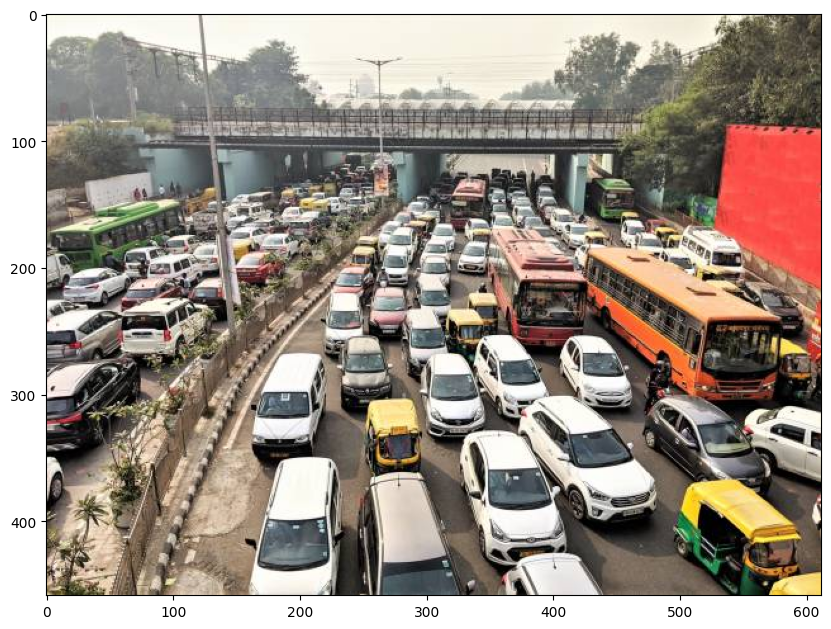

In [53]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()

In [54]:
blob = cv2.dnn.blobFromImage(image_input, 1 / 255.0, (416, 416), swapRB=True, crop=False)
height, width = image_input_shape[:2]
height, width

(459, 612)

In [55]:
print(image_input.shape)
print(blob.shape)

(459, 612, 3)
(1, 3, 416, 416)


In [56]:
network.setInput(blob)

In [57]:
network2.setInput(blob)

In [58]:
output_layers_name=network.getUnconnectedOutLayersNames()
layeroutput=network.forward(output_layers_name)

In [59]:
output_layers_name2=network2.getUnconnectedOutLayersNames()
layeroutput2=network2.forward(output_layers_name2)

In [60]:
boxes=[]
confidences=[]
class_ids=[]

for output in layeroutput:
    for detection in output:
        score=detection[5:]
        class_id=np.argmax(score)
        confidence=score[class_id]
        if confidence>0.5:
            center_x=int(detection[0]*width)
            center_y=int(detection[1]*height)
            w=int(detection[2]*width)
            h=int(detection[3]*height)
        
            x=int(center_x-w/2)
            y=int(center_y-h/2)

            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [61]:
boxes1=[]
confidences1=[]
class_ids1=[]

for output in layeroutput2:
    for detection in output:
        score=detection[5:]
        class_id=np.argmax(score)
        confidence=score[class_id]
        if confidence>0.5:
            center_x=int(detection[0]*width)
            center_y=int(detection[1]*height)
            w=int(detection[2]*width)
            h=int(detection[3]*height)
        
            x=int(center_x-w/2)
            y=int(center_y-h/2)

            boxes1.append([x,y,w,h])
            confidences1.append(float(confidence))
            class_ids1.append(class_id)

In [62]:
len(boxes1)

0

In [63]:
len(boxes)

108

In [64]:
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

In [65]:
indexes1=cv2.dnn.NMSBoxes(boxes1,confidences1,0.5,0.4)

In [66]:
font=cv2.FONT_HERSHEY_PLAIN
colors=np.random.uniform(0,255,size=(len(boxes),3))

In [67]:
font=cv2.FONT_HERSHEY_PLAIN
colors1=np.random.uniform(0,255,size=(len(boxes1),3))

In [68]:
d=[]
for i in indexes.flatten():
    d.append(str(classes[class_ids[i]]))
    x,y,w,h=boxes[i]
    print(classes[class_ids[i]])
    
    label=str(classes[class_ids[i]])
    confi=str(round(confidences[i],2))
    color=colors[i]
    
    cv2.rectangle(image_input,(x,y),(x+w,y+h),color,2)
    cv2.putText(image_input,label+" "+confi,(x,y+20),font,2,(255,0,0),2)
print(len(d))

car
car
car
car
car
car
car
bus
car
car
car
car
bus
car
car
car
car
car
car
car
bus
bus
car
car
car
car
car
car
person
car
bus
car
car
car
car
35


In [71]:
l1=['front','front']
try:
    for i in indexes1.flatten():
        l1.append(classes1[class_ids1[i]])
        x,y,w,h=boxes1[i]
        
        label=str(classes1[class_ids1[i]])
        confi=str(round(confidences1[i],2))
        color=colors1[i]
        
        cv2.rectangle(image_input,(x,y),(x+w,y+h),color,2)
        cv2.putText(image_input,label+" "+confi,(x,y+20),font,2,(255,0,0),2)
except:
    pass
print(l1)

['front', 'front']


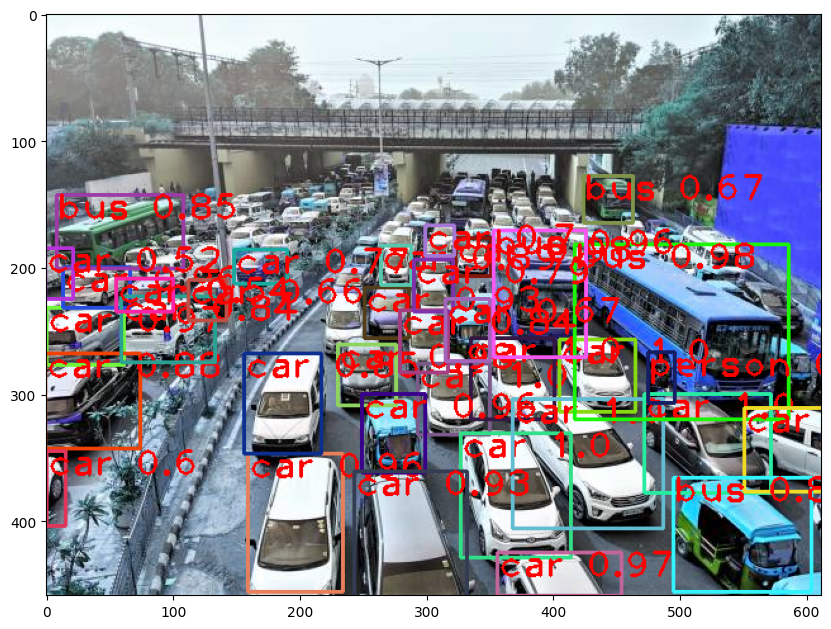

In [72]:
plt.imshow(image_input)

In [73]:
coeff={'car':0.5,'truck':0.9, 'bus':0.8, 'motorcyle':0.2, 'front':0.4, 'cycle':0.2}
d.extend(l1)
density=0
for i in d:
    try:
        density+=coeff[i]
    except:
        pass
print(density)

19.299999999999997
